<a href="https://colab.research.google.com/github/carolinecarneiro/Trabalhos-SoulCode/blob/main/Projeto_Airbnb__Amsterd%C3%A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Escola: SoulCode Academy

Curso: Bootcamp Analista de Dados - Martech - AD2

Professor: Franciane Rodrigues

Aluno: Caroline Carneiro


## Requisitos:

Pergunta de negócio: Faça uma análise exploratória de dados com a base de dados do Airbnb e indique possíveis oportunidades e/ou ameaças para o empreendimento.

Nível - Tratamento e Análise
Verificar todos os passos da estratégia de análise geral de análise de dados;
Executar o que for necessário;
Todos os passos devem ser comentados;
Realizar no mínimo 3 análises apenas numéricas;
Realizar plotagens para no mínimo 3 análises;
Chegar a uma conclusão de sua análise;

Nivel Infra
O Dataset deve ser salvo em ambiente local  
(Google Drive) - (bruto e tratado)
O Dataset deve ser salvo em ambiente cloud (Cloud Storage) - (bruto e tratado) (será mostrado em aula!)
O Arquivo original e tratado deve ser salvo em MongoDB Atlas em coleções diferentes (será mostrado em aula!)

O que será analisado:
Pontualidade;
Organização de código;
Atendimento aos requisitos;
Capacidade de Pesquisa e Autonomia;
Aplicação da Estratégia de Geral de Análise de Dados;
Observação: Em caso de algum(ns) itens não forem contemplados, realize a entrega do que foi concluído com justificativa. Em momento oportuno, solicitaremos acesso aos ambientes em nuvem do projeto.

## Declaração das variáveis

* realsum: preço total da listagem
* room_type: tipo de quarto oferecido
* room_shared: se é quarto compartilhado ou não
* room_private: se é quarto privativo ou não
* person_capacity: número máximo de pessoas permitidas
* host_is_superhost: se é superhost ou não
* multi: se é para várias salas ou não
* biz: para uso comercial ou familiar
* cleanliness_rating: classificação de limpeza
* guest_satisfaction_overall: satisfação geral do hóspede
* bedroomsn: número de quartos (0 para estúdios)
* dist: a distância do centro da cidade
* metro_dist: distância da estação de metrô mais próxima
* attr_index: índice de atração do local do anúncio
* attr_index_norm: índice de atração normalizado (0-100)
* rest_index: índice do restaurante do local da listagem
* rest_index_norm: índice de restaurante normalizado (0-100)
* lng: valor da longitude
* lat: valor da latitude






# ETL
Extração, transformação, carregamento e possível automação do processo de etl dos dados.


## Install e Libs
Instalações e importações das bibliotecas necessárias para o processo de ETL.

In [ ]:
# Executar uma vez
!pip install gcsfs
!pip install pandera

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pandera as pa
from google.colab import drive
from google.cloud import storage
import seaborn as sns

## Extração

In [3]:
#Configuração da quantidade de colunas para aparecer em um Datraframe
pd.set_option('display.max_columns',100)

In [4]:
#drive.mount('/content/drive')

In [5]:
# CONFIGURANDO DA CHAVE DE SEGURANCA - ACESSO O PROJETO
serviceAccount = '/content/projetocaroline-fd3f6c5d07d2.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [6]:
# # # Configurações Google Cloud Storage - ACESSO AO BUCKET
client = storage.Client()
bucket = client.get_bucket('caroline_carneiro')                         # nome da bucket
bucket.blob('airbnb_bruto.csv')                                     # nome do arquivo
path = 'gs://caroline_carneiro/Projeto Airbnb/dados_brutos/airbnb_bruto.csv'   # gsutil

In [7]:
# Abertura da base de dados (bucket)
df = pd.read_csv(path,
                 sep=',',
                 encoding='ISO-8859-1',
                 dayfirst = True)
dfback = df.copy()

## **Pré-Análise**

In [8]:
# visualizando
df

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,Entire home/apt,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,Private room,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,Private room,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,Entire home/apt,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


In [9]:
#visualizando
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103 entries, 0 to 1102
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  1103 non-null   int64  
 1   realSum                     1103 non-null   float64
 2   room_type                   1103 non-null   object 
 3   room_shared                 1103 non-null   bool   
 4   room_private                1103 non-null   bool   
 5   person_capacity             1103 non-null   float64
 6   host_is_superhost           1103 non-null   bool   
 7   multi                       1103 non-null   int64  
 8   biz                         1103 non-null   int64  
 9   cleanliness_rating          1103 non-null   float64
 10  guest_satisfaction_overall  1103 non-null   float64
 11  bedrooms                    1103 non-null   int64  
 12  dist                        1103 non-null   float64
 13  metro_dist                  1103 

In [10]:
# Backup local do df
dfback1 = df.copy()

In [11]:
df.rename(columns={'Unnamed: 0':'numeraçao','room_type':'tipo_quarto','superhost':'super_anfitriao','room_shared':'compartilhado','room_private':'quarto_privado','person_capacity':'capacidade','attr_index':'indice_de_atracao','rest_index':'indice_do_restaurante','bedrooms':'quartos','cleanliness_rating':'nota_limpeza','host_is_superhost':'superhost','guest_satisfaction_overall':'satisfacao','dist':'distancia_centro','metro_dist':'distancia_metro','realSum':'preco_total','lat':'latitude','lng':'longitude'}, inplace = True)

## Limpeza de Dados ##
Remover dados duplicados, corrigir erros de digitação, tratar dados inconsistentes etc.

In [12]:
#renomeando as colunas
df.rename(columns={'Unnamed: 0':'numeraçao','room_type':'tipo_quarto','superhost':'super_anfitriao','room_shared':'compartilhado','room_private':'quarto_privado','person_capacity':'capacidade','attr_index':'indice_de_atracao','rest_index':'indice_do_restaurante','bedrooms':'quartos','cleanliness_rating':'nota_limpeza','host_is_superhost':'superhost','guest_satisfaction_overall':'satisfacao','dist':'distancia_centro','metro_dist':'distancia_metro','realSum':'preco_total','lat':'latitude','lng':'longitude'}, inplace = True)

In [ ]:
# conferindo
df

In [ ]:
# verificando dados inconsistentes
print(sorted(pd.unique(df['numeraçao'])))

In [15]:
#verificando dados repetidos
df.numeraçao.is_unique

True

In [16]:
#verificando as categorias dos tipos de quarto
print(sorted(pd.unique(df['tipo_quarto'])))

['Entire home/apt', 'Private room', 'Shared room']


In [17]:
#traduzindo os tipos de quarto
df.loc[df.tipo_quarto == 'Private room',['tipo_quarto']] = 'QUARTO PRIVADO'
df.loc[df.tipo_quarto == 'Entire home/apt',['tipo_quarto']] = 'APT/CASA INTEIRA'
df.loc[df.tipo_quarto == 'Shared room',['tipo_quarto']] = 'QUARTO COMPARTILHADO'

#conferindo
print(sorted(pd.unique(df['tipo_quarto'])))

['APT/CASA INTEIRA', 'QUARTO COMPARTILHADO', 'QUARTO PRIVADO']


In [18]:
#Visualizando as colunas
df

,numeraçao,preco_total,tipo_quarto,compartilhado,quarto_privado,capacidade,super_anfitriao,multi,biz,nota_limpeza,satisfacao,quartos,distancia_centro,distancia_metro,indice_de_atracao,attr_index_norm,indice_do_restaurante,rest_index_norm,longitude,latitude
0,0,194.033698,QUARTO PRIVADO,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772
1,1,344.245776,QUARTO PRIVADO,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432
2,2,264.101422,QUARTO PRIVADO,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103
3,3,433.529398,QUARTO PRIVADO,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663
4,4,485.552926,QUARTO PRIVADO,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,1098,2486.115342,APT/CASA INTEIRA,False,False,2.0,False,0,0,10.0,100.0,1,2.375833,1.436054,181.198355,9.594573,225.304203,15.699521,4.85869,52.37677
1099,1099,233.637194,QUARTO PRIVADO,False,True,2.0,False,1,0,10.0,90.0,1,4.719736,0.322263,108.024880,5.719989,134.775277,9.391335,4.83611,52.34910
1100,1100,317.062311,QUARTO PRIVADO,False,True,2.0,False,1,0,10.0,92.0,1,0.598355,0.751993,440.476515,23.323524,625.947562,43.616927,4.88897,52.37798
1101,1101,1812.855904,APT/CASA INTEIRA,False,False,4.0,False,0,0,8.0,84.0,5,1.943020,0.388532,257.948105,13.658524,336.589237,23.454022,4.90688,52.35794


In [19]:
# Retirada de colunas com problemas e/ou não utilizadas na analise
df.drop(['compartilhado','quarto_privado','numeraçao','rest_index_norm','indice_do_restaurante','attr_index_norm','indice_de_atracao','latitude','longitude'],axis=1, inplace=True)

In [ ]:
#lembrando as colunas
df

In [21]:
# verificando os dados das colunas
print(sorted(pd.unique(df['super_anfitriao'])))

[False, True]


In [22]:
#alterando o nome dos linhas
df.loc[df.super_anfitriao == False,['super_anfitriao']] = 'NAO'
df.loc[df.super_anfitriao == True, ['super_anfitriao']] = 'SIM'


In [23]:
# conferindo
print(sorted(pd.unique(df['super_anfitriao'])))

['NAO', 'SIM']


In [24]:
#conferindo se tem colunas com dados nulos
df.isnull().sum()

preco_total         0
tipo_quarto         0
capacidade          0
super_anfitriao     0
multi               0
biz                 0
nota_limpeza        0
satisfacao          0
quartos             0
distancia_centro    0
distancia_metro     0
dtype: int64

In [25]:
#teste de arredondamento
round(df['distancia_centro'], 2)

0       5.02
1       0.49
2       5.75
3       0.38
4       0.54
        ... 
1098    2.38
1099    4.72
1100    0.60
1101    1.94
1102    0.28
Name: distancia_centro, Length: 1103, dtype: float64

In [26]:
#arredondamentos de algumas colunas
df['preco_total'] = round(df['preco_total'], 2)
df['distancia_centro'] = round(df['distancia_centro'], 3)
df['distancia_metro'] = round(df['distancia_metro'], 3)

In [27]:
#conferindo
df

,preco_total,tipo_quarto,capacidade,super_anfitriao,multi,biz,nota_limpeza,satisfacao,quartos,distancia_centro,distancia_metro
0,194.03,QUARTO PRIVADO,2.0,NAO,1,0,10.0,93.0,1,5.023,2.539
1,344.25,QUARTO PRIVADO,4.0,NAO,0,0,8.0,85.0,1,0.488,0.239
2,264.10,QUARTO PRIVADO,2.0,NAO,0,1,9.0,87.0,1,5.748,3.652
3,433.53,QUARTO PRIVADO,4.0,NAO,0,1,9.0,90.0,2,0.385,0.440
4,485.55,QUARTO PRIVADO,2.0,SIM,0,0,10.0,98.0,1,0.545,0.319
...,...,...,...,...,...,...,...,...,...,...,...
1098,2486.12,APT/CASA INTEIRA,2.0,NAO,0,0,10.0,100.0,1,2.376,1.436
1099,233.64,QUARTO PRIVADO,2.0,NAO,1,0,10.0,90.0,1,4.720,0.322
1100,317.06,QUARTO PRIVADO,2.0,NAO,1,0,10.0,92.0,1,0.598,0.752
1101,1812.86,APT/CASA INTEIRA,4.0,NAO,0,0,8.0,84.0,5,1.943,0.389


In [28]:
#conferindo os dados dentro das colunas
print(sorted(pd.unique(df['capacidade'])))

[2.0, 3.0, 4.0, 5.0, 6.0]


In [29]:
#conferindo os dados dentro das colunas
print(sorted(pd.unique(df['multi'])))

[0, 1]


In [30]:
#conferindo os dados dentro das colunas
print(sorted(pd.unique(df['biz'])))

[0, 1]


In [31]:
#conferindo os dados dentro das colunas
print(sorted(pd.unique(df['nota_limpeza'])))

[4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]


In [ ]:
#conferindo os dados dentro das colunas
print(sorted(pd.unique(df['satisfacao'])))

In [33]:
#conferindo os dados dentro das colunas
print(sorted(pd.unique(df['quartos'])))

[0, 1, 2, 3, 4, 5]


In [ ]:
#conferindo os dados dentro das colunas
print(sorted(pd.unique(df['distancia_centro'])))

In [ ]:
#conferindo os dados dentro das colunas
print(sorted(pd.unique(df['distancia_metro'])))

In [ ]:
#alterando o tipo de dados
df['capacidade'] = df['capacidade'].astype(int)
df['nota_limpeza'] = df['nota_limpeza'].astype(int)

df

## Qualidade e integridade dos dados

In [37]:
df.dtypes

preco_total         float64
tipo_quarto          object
capacidade            int64
super_anfitriao      object
multi                 int64
biz                   int64
nota_limpeza          int64
satisfacao          float64
quartos               int64
distancia_centro    float64
distancia_metro     float64
dtype: object

In [ ]:
# Definir o esquema de validação
schema = pa.DataFrameSchema({'preco_total': pa.Column(pa.Float),
                            'tipo_quarto': pa.Column(pa.String),
                            'capacidade': pa.Column(pa.Int),
                            'super_anfitriao': pa.Column(pa.String),
                            'multi': pa.Column(pa.Int),
                            'biz': pa.Column(pa.Int),
                            'nota_limpeza': pa.Column(pa.Int),
                            'satisfacao': pa.Column(pa.Float),
                            'quartos': pa.Column(pa.Int),
                            'distancia_centro': pa.Column(pa.Float),
                            'distancia_metro': pa.Column(pa.Float)
                            })

# Validar o DataFrame
schema.validate(df)

In [39]:
# Backup local do df tratado
dfback3 = df.copy()

## Carregamento

In [40]:
# Exportação em uma pasta Google Drive
#df.to_csv('/content/drive/MyDrive/TrabalhosSoulcode/Airbnb/Airbnb_tratado.csv',index=False)

In [41]:
# Google Cloud
df.to_csv('gs://caroline_carneiro/Projeto Airbnb/dados_tratados/airbnb_tratado.csv',  index=False) # salva no bucket


In [42]:
# Backup local do df
dfback2 = df.copy()

# Groupby


In [43]:
# achando a contagem de airbnb por nivel de satisfacao
df.groupby(['satisfacao']).size()

satisfacao
20.0       1
47.0       1
60.0       3
65.0       1
70.0       1
73.0       1
74.0       1
75.0       2
76.0       1
77.0       1
78.0       3
80.0      24
81.0       3
82.0       5
83.0       6
84.0      11
85.0      13
86.0      14
87.0      21
88.0      30
89.0      20
90.0      51
91.0      30
92.0      48
93.0      67
94.0      69
95.0      82
96.0     121
97.0      95
98.0     122
99.0      65
100.0    190
dtype: int64

In [44]:
df.groupby(['satisfacao']).size().sort_values()

satisfacao
20.0       1
47.0       1
65.0       1
70.0       1
73.0       1
74.0       1
76.0       1
77.0       1
75.0       2
60.0       3
78.0       3
81.0       3
82.0       5
83.0       6
84.0      11
85.0      13
86.0      14
89.0      20
87.0      21
80.0      24
88.0      30
91.0      30
92.0      48
90.0      51
99.0      65
93.0      67
94.0      69
95.0      82
97.0      95
96.0     121
98.0     122
100.0    190
dtype: int64

In [45]:
# fazendo a contagem de airbnd por capacidade
df.groupby(['capacidade']).size().sort_values(ascending=False)

capacidade
2    656
4    333
3     79
6     24
5     11
dtype: int64

In [ ]:
df

In [47]:
# fazendo a contagem de airbnb que são super_anfitriao
df.groupby(['super_anfitriao']).size().sort_values(ascending=False)

super_anfitriao
NAO    780
SIM    323
dtype: int64

In [48]:
hoteis_proximo_centro = df["distancia_centro"] < 1

print(hoteis_proximo_centro)

0       False
1        True
2       False
3        True
4        True
        ...  
1098    False
1099    False
1100     True
1101    False
1102     True
Name: distancia_centro, Length: 1103, dtype: bool


In [ ]:
df

In [50]:
df.groupby(['capacidade']).size()

capacidade
2    656
3     79
4    333
5     11
6     24
dtype: int64

# Análise

In [51]:
## describle dos valores com outliers
df['preco_total'].describe()

count    1103.000000
mean      545.020535
std       416.974277
min       128.890000
25%       309.800000
50%       430.250000
75%       657.320000
max      7782.910000
Name: preco_total, dtype: float64

In [52]:
# encontrando as medidas estatísticas
Q1 = df['preco_total'].describe()[4]
Q3 = df['preco_total'].describe()[6]

amplitude_interquatilica = Q3 - Q1

#encontrando limite inferior e superior
limite_inferior = Q1 - 1.5 * amplitude_interquatilica
limite_superior = Q3 + 1.5 * amplitude_interquatilica

# encontrando e eliminando os outliers
for i in range(len(df.preco_total)):
  if df.preco_total[i] < limite_inferior or df.preco_total[i] > limite_superior:
    df.drop([i], inplace = True)

In [53]:
#conferindo
df['preco_total'].describe()

count    1047.000000
mean      480.533725
std       228.301101
min       128.890000
25%       306.635000
50%       411.500000
75%       614.440000
max      1167.250000
Name: preco_total, dtype: float64

In [54]:
# Calcule a média dos preços airbnb
media = df['preco_total'].mean()

# Calcule a moda dos preços airbnb
moda = df['preco_total'].mode()[0]  # Pode haver mais de uma moda, então pegamos apenas a primeira

# Calcule a mediana dos preços airbnb
mediana = df['preco_total'].median()

# Imprima os resultados
print('Média:', media)
print('Moda:', moda)
print('Mediana:', mediana)

Média: 480.5337249283667
Moda: 614.44
Mediana: 411.5


In [55]:
df.tipo_quarto.value_counts()

QUARTO PRIVADO          555
APT/CASA INTEIRA        486
QUARTO COMPARTILHADO      6
Name: tipo_quarto, dtype: int64

In [56]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.tipo_quarto.value_counts()/df.shape[0]

QUARTO PRIVADO          0.530086
APT/CASA INTEIRA        0.464183
QUARTO COMPARTILHADO    0.005731
Name: tipo_quarto, dtype: float64

In [57]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.capacidade.value_counts()/df.shape[0]

2    0.621777
4    0.288443
3    0.071633
6    0.010506
5    0.007641
Name: capacidade, dtype: float64

# visualizações

Text(0.5, 1.0, 'Boxplot dos Preços')

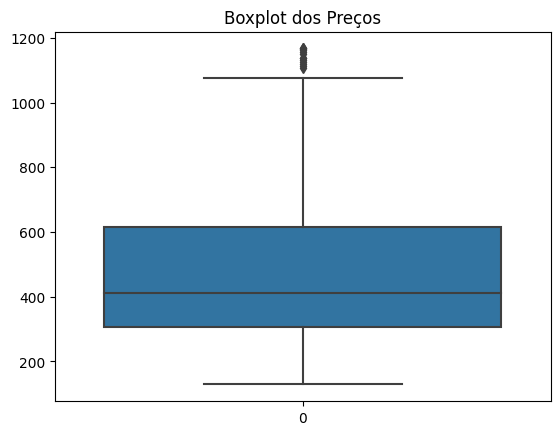

In [73]:
import seaborn as sns

sns.boxplot(df.preco_total)
plt.title('Boxplot dos Preços')

Text(0.5, 1.0, 'Capacidade de pessoas x Quantidade de Airbnb')

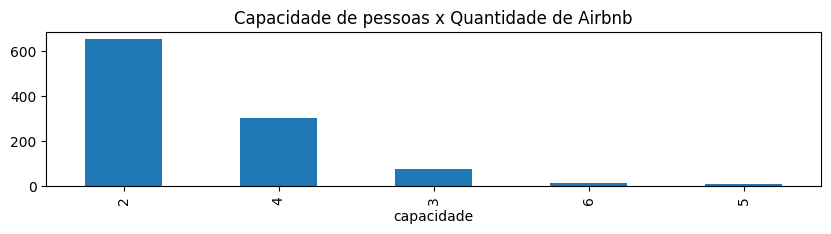

In [74]:
# grafico de barras com os dados da capacidade de pessoas do airbnb x disponibilidade
df.groupby(['capacidade'], dropna=False).size().sort_values(ascending=False).plot.bar(figsize=(10, 2))
plt.title('Capacidade de pessoas x Quantidade de Airbnb')

Text(0.5, 1.0, 'Tipos de Quartos')

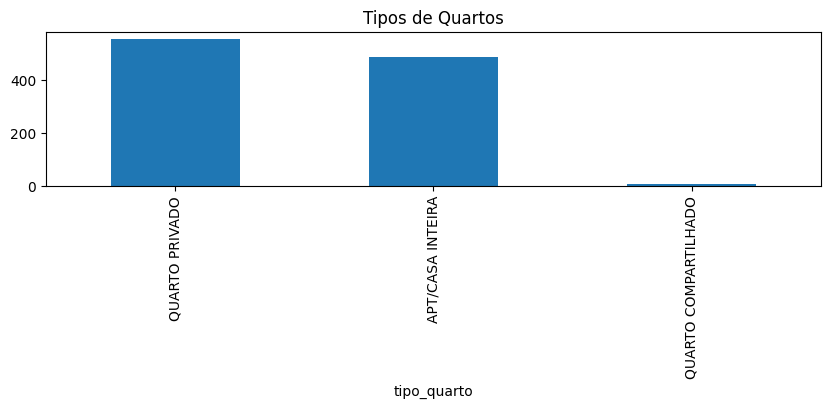

In [69]:
# grafico de barras da predominância dos tipos de quarto x disponibilidade
df.groupby(['tipo_quarto'], dropna=False).size().sort_values(ascending=False).plot.bar(figsize=(10, 2))
plt.title('Tipos de Quartos')

Text(0.5, 1.0, 'Avaliação de limpeza x Quantidade de Airbnb')

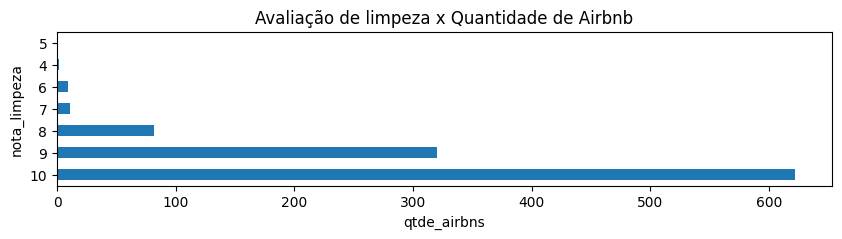

In [71]:
# gráfico de barras horizontal sobre a quantidade de airbnb X nota de limpeza
df.groupby(['nota_limpeza'], dropna=False).size().sort_values(ascending=False).plot.barh(figsize=(10, 2), xlabel='qtde_airbns')
plt.title('Avaliação de limpeza x Quantidade de Airbnb')

<ipython-input-72-64c95cbd010f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Text(0.5, 1.0, 'Correlações entre atributos')

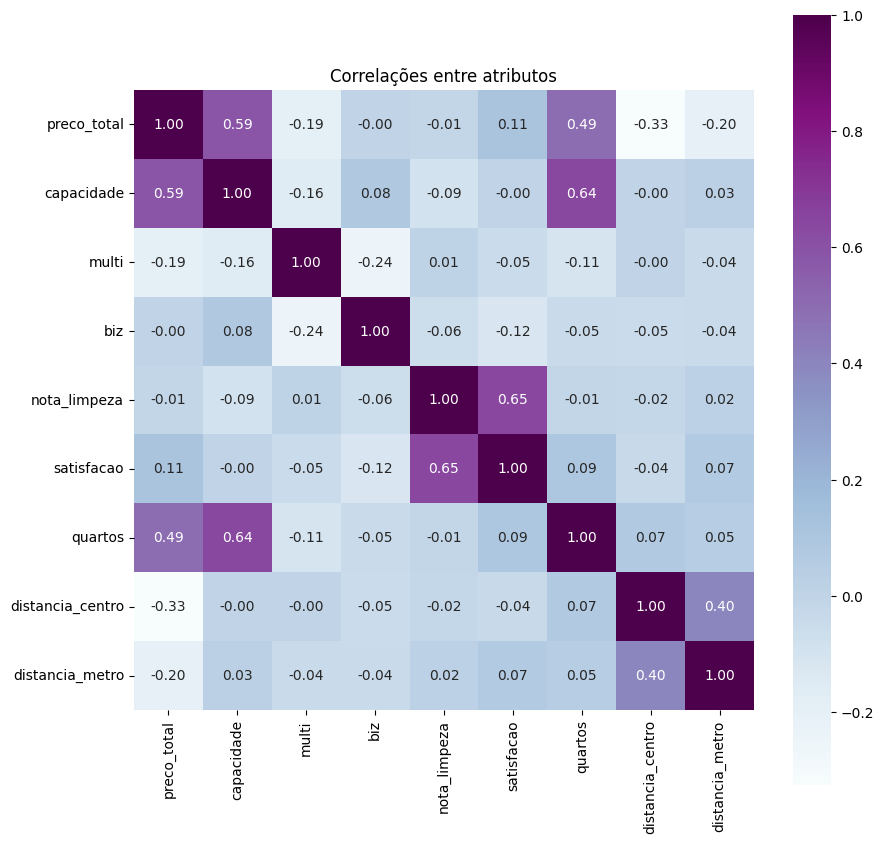

In [72]:
# heatmap para veridicar as correlações
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, fmt='.2f' ,cmap='BuPu',annot=True, square=True);
plt.title('Correlações entre atributos')

# Conclusão

Foi realizada uma análise geral na base de dados de instações Airbnb em Amsterdã, nessa análise verificamos em relação ao preços dos airbnb do estudo como média de valores €480.53, a moda €614.44 e a mediana €411.50, já desconsiderando os outliers.
Em relação a nível satisfação percebemos que os Airbnbs com melhores notas, também possuem boas avaliações de limpeza, mostrando uma possivel relação.
Também percebemos que 53% instalações airbnb do estudo são quartos privados e 46% apt/ casa inteira. Em relação a capacidade 62% das instalações recebem até 2 pessoas.